In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [56]:
!pip install tqdm

    100% |████████████████████████████████| 61kB 2.8MB/s ta 0:00:01


In [8]:
%matplotlib inline

In [41]:
cd ../home/jovyan/ames-Iowa-dataset-analysis

/home/jovyan/ames-Iowa-dataset-analysis


In [42]:
%run src/load_data.py

In [11]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
housing_df                   DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_ouliers_removed_df   DataFrame         MSSubClass MSZoning <...>n[1437 rows x 80 columns]
listing_df                   DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
numeric_df                   DataFrame          LotFrontage  LotAre<...>n[1451 rows x 23 columns]
numeric_final_df             DataFrame          LotFrontage   LotAr<...>n[1437 rows x 23 columns]
numeric_log_df               DataFrame          LotFrontage    LotA<...>n[1451 rows x 23 columns]
numeric_log_sc_df            DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
numeric_sc_df                DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
sale_df                      DataFrame            Id  MoSold  YrSol<...>\n[1460 rows x 6 columns]
zoning_df     

In [12]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(numeric_final_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

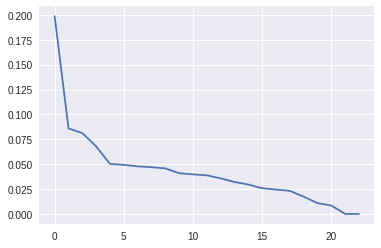

In [14]:
plt.plot(pca.explained_variance_ratio_)

It seems only 3 variables can explain the majority of the salesprice

In [15]:
pca = PCA(10)
pca.fit(numeric_final_df)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

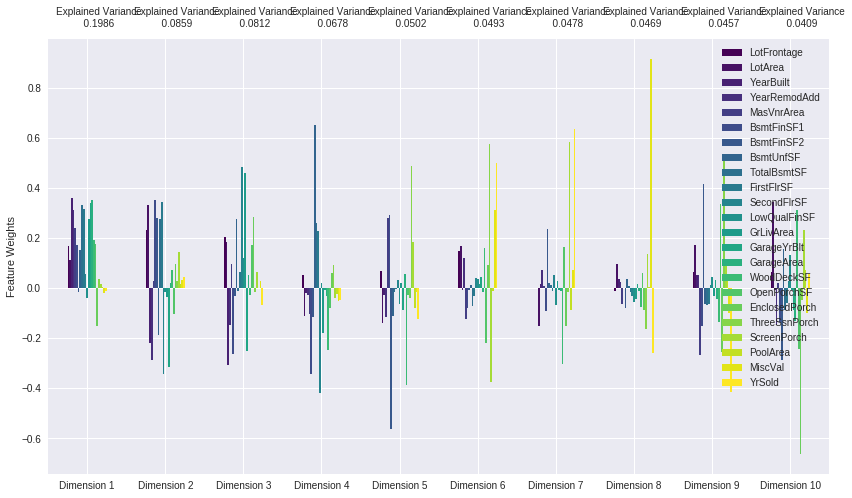

In [16]:
import lib.viz_helper as viz
pca_df = viz.pca_results(numeric_final_df, pca)

In [17]:
numeric_pca = pca.transform(numeric_final_df)

In [18]:
numeric_pca.shape

(1437, 10)

**One hot encoding and merge into dataframe**

In [19]:
cat = housing_df.select_dtypes(include=['category'])

In [20]:
cate = pd.get_dummies(cat, prefix_sep='_',)

In [21]:
features = pd.merge(cate, numeric_df, left_index=True, right_index=True)

In [22]:
features.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,2003.0,548,0,61,0,0,0,0,0,2008
2,1,0,0,0,0,0,0,0,0,0,...,1976.0,460,298,0,0,0,0,0,0,2007
3,0,0,0,0,0,1,0,0,0,0,...,2001.0,608,0,42,0,0,0,0,0,2008
4,0,0,0,0,0,0,1,0,0,0,...,1998.0,642,0,35,272,0,0,0,0,2006
5,0,0,0,0,0,1,0,0,0,0,...,2000.0,836,192,84,0,0,0,0,0,2008


In [210]:
x = features

In [211]:
y = housing_df.SalePrice

**SELECTION Method 1: features-selectuion by decision tree classifier**

In [212]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_features=20)
model.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [213]:
model = DecisionTreeClassifier(max_features=200)
model.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=200, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [214]:
x.columns

Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold'],
      dtype='object', length=382)

In [215]:
important_factors = model.feature_importances_
features_col = x.columns
importances = pd.Series(important_factors.ravel(), index=features_col)

In [216]:
features_col = x.columns
importances = pd.Series(important_factors.ravel(), index=features_col)

In [217]:
ranking = importances.sort_values(ascending=False)
top_10 = ranking.head(10)
top_10



TotalBsmtSF     0.031645
BsmtUnfSF       0.030212
LotArea         0.030036
GrLivArea       0.028468
LotFrontage     0.026740
GarageArea      0.024755
BsmtFinSF1      0.024036
GarageYrBlt     0.023340
YearBuilt       0.022741
YearRemodAdd    0.022064
dtype: float64

*For the decition tree classifier method, we can see that the 10 most important factors are:*
GrLivArea, LotArea  YearRemodAdd  TotalBsmtSF    BsmtFinSF1   YearBuilt LotFrontage FirstFlrSF GarageArea  BsmtUnfSF     

**Univariate feature selection,Selection Method 2, Using SelectKBest Package **

In [218]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=10).fit(x, y)

In [219]:

print('Feature list:', x.columns)

Feature list: Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold'],
      dtype='object', length=382)


**WE CAN SEE FOR This method, the 10 most important features are **
('GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal''YrSold')

**Selection 3:  Recursive feature elimination (RFE) with random forest**

In [228]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(x, y)

In [229]:
print('Chosen best 10 feature by rfe:',x.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['LotFrontage', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea'],
      dtype='object')


By using the RFE method, we can see the most 10 features are 'LotFrontage', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea'

clustering, we use the top features: 'LotFrontage', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea'

In [1]:
top_features = ['LotFrontage', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea']

In [25]:
np.random.seed(100)
sample_df = features.sample(10)
sample_df[top_features]

,LotFrontage,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageYrBlt,GarageArea
Id,,,,,,,,,,
358,44.000000,4224,1976,874,268,1142,1142,1142,1976.000000,528
825,81.000000,11216,2006,0,1489,1489,1489,1489,2006.000000,776
370,70.049958,9830,1959,72,733,1063,1287,1287,1997.000000,576
292,55.000000,5687,1912,210,570,780,936,1716,1978.506164,0
135,78.000000,10335,1968,570,891,1461,1721,1721,1968.000000,440
1437,60.000000,9000,1971,616,248,864,864,864,1974.000000,528
979,68.000000,9450,1954,552,342,894,894,894,1999.000000,400
174,80.000000,10197,1961,288,700,1362,1362,1362,1961.000000,504
846,70.049958,16647,1975,1390,0,1390,1701,1701,1975.000000,611


In [53]:
cd /home/jovyan/ames-Iowa-dataset-analysis/

/home/jovyan/ames-Iowa-dataset-analysis


In [57]:
from sklearn.decomposition import PCA
import lib.visuals as vs

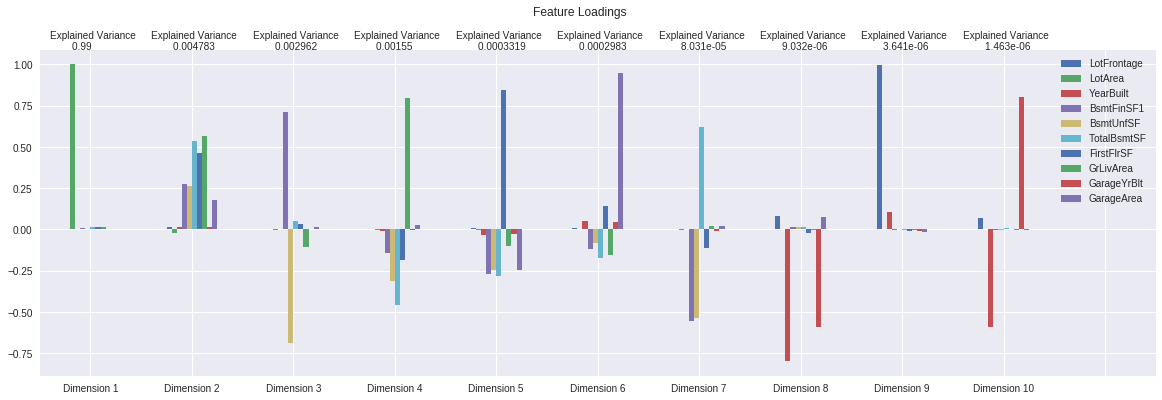

In [77]:
pca = PCA()
pca.fit(features[top_features])
featureplot = vs.FeatureLoadingsPlot(features[top_features], pca, 10)
featureplot.display_segments()

In [62]:
pca_2 = PCA(n_components=2)
pca_2.fit(features[top_features])
pca_3 = PCA(n_components=3)
pca_3.fit(features[top_features])
pca_4 = PCA(n_components=4)
pca_4.fit(features[top_features])

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [73]:

housing_pca_2 = pd.DataFrame(pca_2.transform(features[top_features]), 
                               columns=['Dimension 1', 'Dimension 2'])
housing_pca_3 = pd.DataFrame(pca_3.transform(features[top_features]), 
                               columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
housing_pca_4 = pd.DataFrame(pca_4.transform(features[top_features]), 
                               columns=['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'])


100%|██████████| 3/3 [00:00<00:00, 12.62it/s]

For n_clusters = 2 the silhouette score is 0.9650905750133234.
For n_clusters = 3 the silhouette score is 0.800161465632046.
For n_clusters = 4 the silhouette score is 0.48702533682908866.


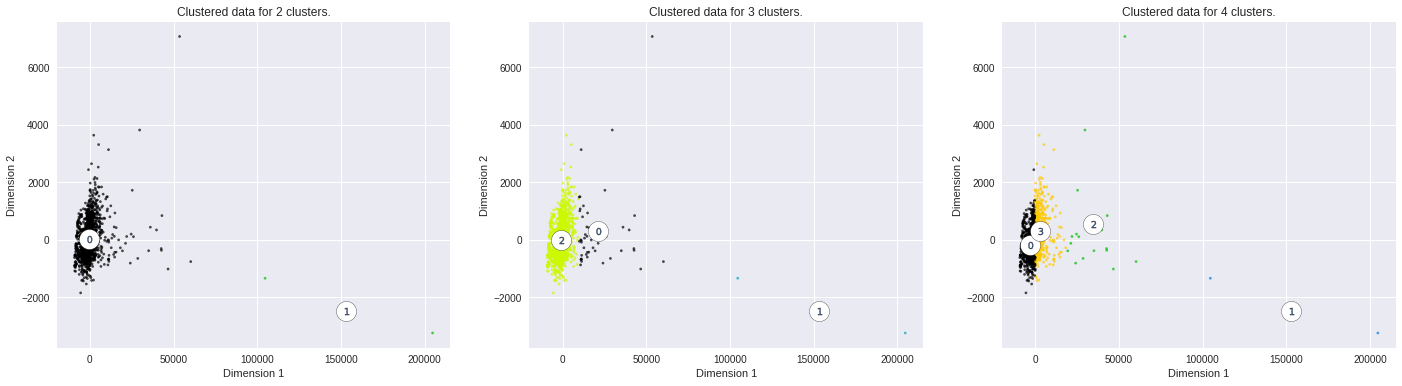

In [74]:
pca_2_clusters = vs.Clusters(housing_pca_2, range(2,5))
pca_2_clusters.cluster_plots(1,2)

100%|██████████| 3/3 [00:00<00:00, 12.28it/s]

For n_clusters = 2 the silhouette score is 0.9643866665844578.
For n_clusters = 3 the silhouette score is 0.8319366664066523.
For n_clusters = 4 the silhouette score is 0.467666949940565.


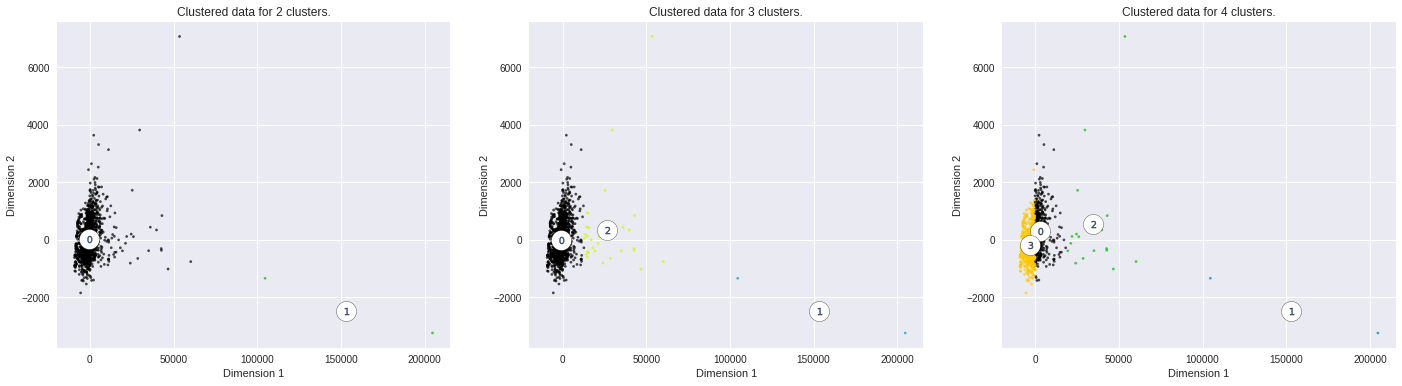

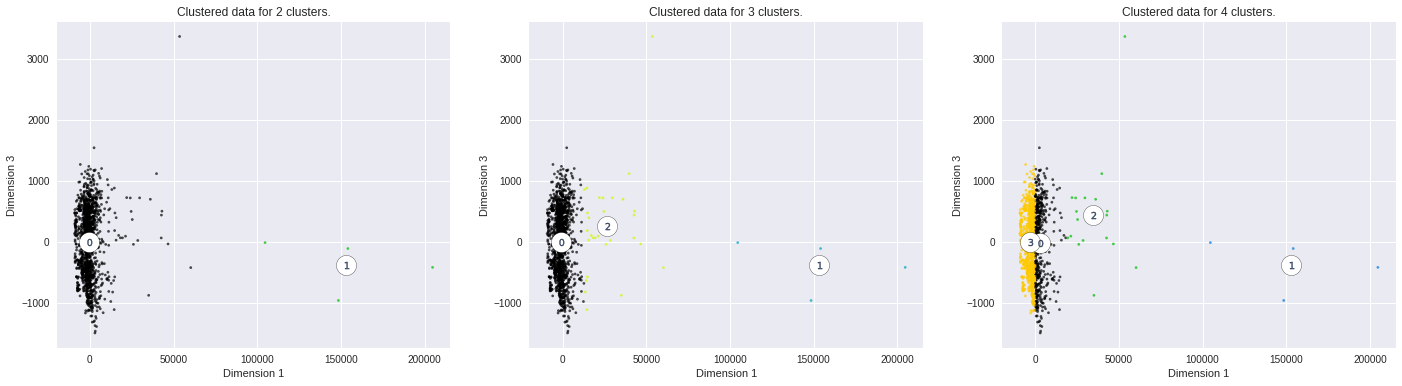

In [75]:

pca_3_clusters = vs.Clusters(housing_pca_3, range(2,5))
pca_3_clusters.cluster_plots(1,2)
pca_3_clusters.cluster_plots(1,3)

100%|██████████| 3/3 [00:00<00:00, 11.62it/s]

For n_clusters = 2 the silhouette score is 0.9640297004826679.
For n_clusters = 3 the silhouette score is 0.8250892093150548.
For n_clusters = 4 the silhouette score is 0.45914635992865593.


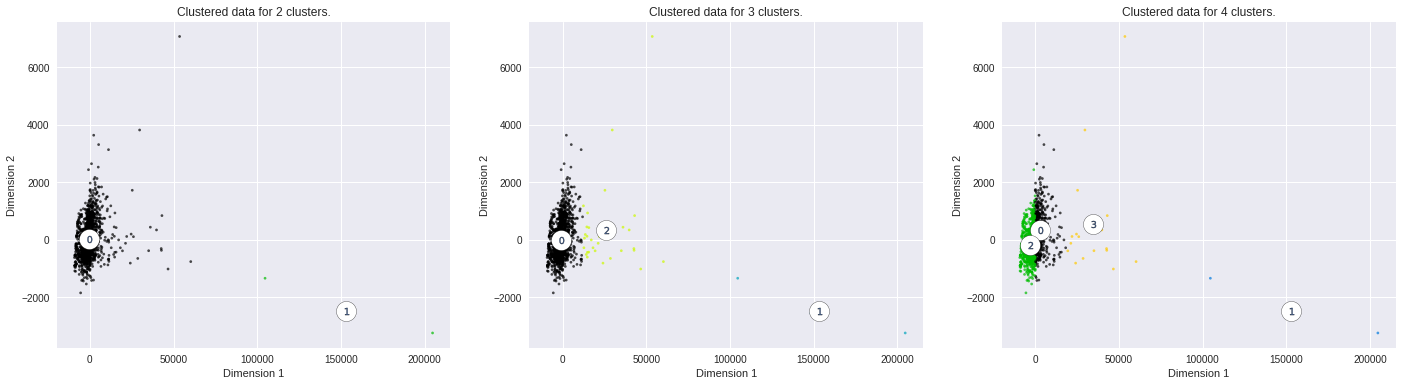

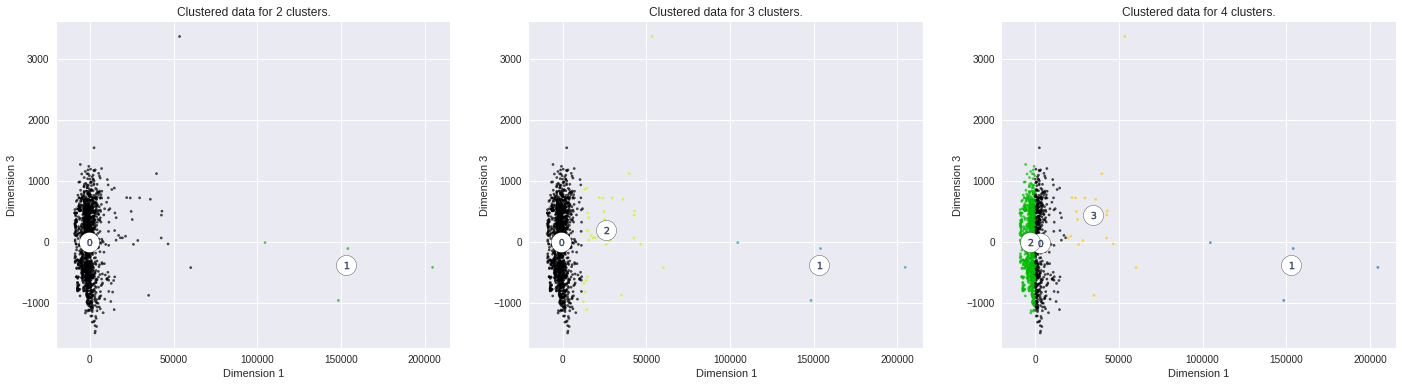

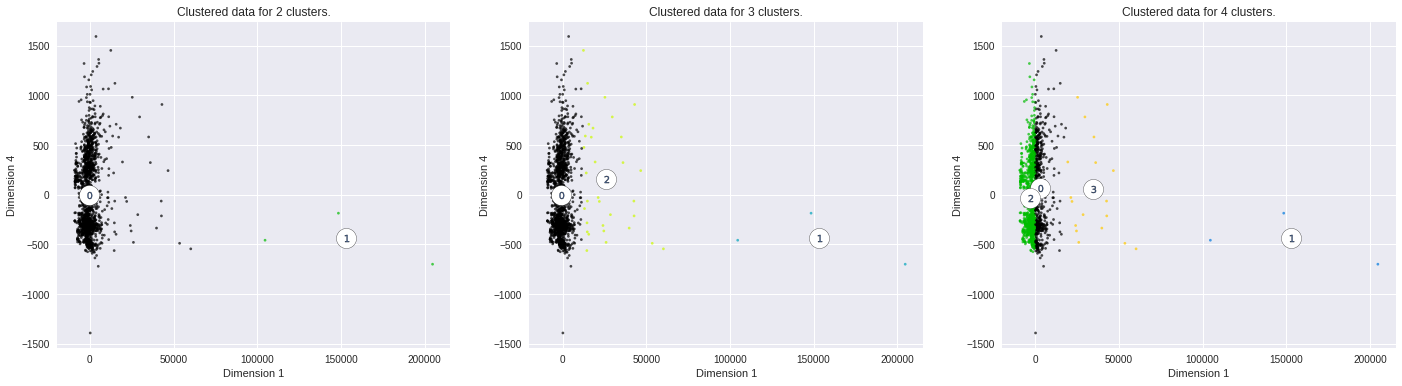

In [76]:
pca_4_clusters = vs.Clusters(housing_pca_4, range(2,5))
pca_4_clusters.cluster_plots(1,2)
pca_4_clusters.cluster_plots(1,3)
pca_4_clusters.cluster_plots(1,4)